In [16]:
from model import Sequential
from layers import Input, Dense
import numpy as np

## Classification

In [4]:
from model import Sequential
from layers import Input, Dense
import numpy as np
from sklearn.datasets import load_breast_cancer

# nx, m = 10, 1000
# ny = 1
# X = np.random.randn(nx, m)
# X = X / np.linalg.norm(X, axis=0)
# y_label = np.random.randint(0, ny + 1, (1, m))

X, y = load_breast_cancer(return_X_y=True)
X = X.T
X = X / np.linalg.norm(X, axis=0)
y = y.reshape(1, -1)

print(y.shape, X.shape, X.max(), X.min())

nx, m = X.shape
ny = 1

# def one_hot(y_label, classes):
#     y = np.zeros((classes, y_label.shape[1]))
#     for i in range(y_label.shape[1]):
#         y[y_label[0, i], i] = 1
#     return y


# Y = one_hot(y_label, ny)

m = Sequential("my_model")
inp = Input((nx,), name="First Input")
dense = Dense(20, activation="sigmoid", name="Dense 1")
m.add(inp)
m.add(dense)
m.add(Dense(10, name="Dense A", activation="sigmoid"))
m.add(Dense(8, name="Dense C", activation="sigmoid"))
m.add(Dense(ny, name="Dense Z", activation="sigmoid"))

m.summary()

m.compile(loss="binary_cross_entropy", metrics=["accuracy"])
# m.compile(loss="mse", metrics=["accuracy"])

# y_new = m[3].forward(m[2].forward(m[1].forward(X)))

# y_hat = m.fit(X, y)
# print(y_hat.max(), y_hat.min())
# assert y_hat.shape == y.shape
# assert np.allclose(y_hat, y_new)

# m.fit(X, y, epochs=20, verbose=1, lr=0.1)

(1, 569) (30, 569) 0.9212432903035124 0.0
Model: my_model
_________________________________________________________________________________________
Name           # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-----------  -----------  ---------------  -------------  --------------  ---------------
First Input           30  (0, 0)           (0, 0)                      0  (30,)
Dense 1               20  (20, 30)         (20, 1)                   620  (20,)
Dense A               10  (10, 20)         (10, 1)                   210  (10,)
Dense C                8  (8, 10)          (8, 1)                     88  (8,)
Dense Z                1  (1, 8)           (1, 1)                      9  (1,)
Total Parameters: 927
_________________________________________________________________________________________


In [5]:
m.fit(X, y, epochs=100, verbose=0, lr=0.1)

In [7]:
# m[-1].output

In [28]:
y_hat = m[-1].output
y_hat.shape, y_hat.max(), y_hat.min()

((1, 569), 0.6274171258721395, 0.6274161781975626)

## Regression

In [5]:
from model import Sequential
from layers import Input, Dense
import numpy as np
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=10, n_targets=1)
X = X.T
X = X / np.linalg.norm(X, axis=0)
y = y.reshape(1, -1)

print(y.shape, X.shape, X.max(), X.min())

nx, m = X.shape
ny = 1


m = Sequential("my_model")
inp = Input((nx,), name="First Input")
dense = Dense(20, activation="sigmoid", name="Dense 1")
m.add(inp)
m.add(dense)
m.add(Dense(10, name="Dense A", activation="sigmoid"))
m.add(Dense(8, name="Dense C", activation="sigmoid"))
m.add(Dense(ny, name="Dense Z", activation="linear"))

m.summary()

m.compile(loss="mse", metrics=["mse"])

(1, 200) (10, 200) 0.8837480062988694 -0.8656949895270739
Model: my_model
_________________________________________________________________________________________
Name           # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-----------  -----------  ---------------  -------------  --------------  ---------------
First Input           10  (0, 0)           (0, 0)                      0  (10,)
Dense 1               20  (20, 10)         (20, 1)                   220  (20,)
Dense A               10  (10, 20)         (10, 1)                   210  (10,)
Dense C                8  (8, 10)          (8, 1)                     88  (8,)
Dense Z                1  (1, 8)           (1, 1)                      9  (1,)
Total Parameters: 527
_________________________________________________________________________________________


In [4]:
m.fit(X, y, epochs=10, verbose=1, lr=0.2)

Epoch 1/10 | Loss: 19372.7614 | MeanSquaredError: 19755.3802 | 
Epoch 2/10 | Loss: 19372.7569 | MeanSquaredError: 19755.3802 | 
Epoch 3/10 | Loss: 19372.7519 | MeanSquaredError: 19755.3802 | 
Epoch 4/10 | Loss: 19372.7466 | MeanSquaredError: 19755.3802 | 
Epoch 5/10 | Loss: 19372.7409 | MeanSquaredError: 19755.3802 | 
Epoch 6/10 | Loss: 19372.7346 | MeanSquaredError: 19755.3802 | 
Epoch 7/10 | Loss: 19372.7278 | MeanSquaredError: 19755.3802 | 
Epoch 8/10 | Loss: 19372.7204 | MeanSquaredError: 19755.3802 | 
Epoch 9/10 | Loss: 19372.7122 | MeanSquaredError: 19755.3802 | 
Epoch 10/10 | Loss: 19372.7032 | MeanSquaredError: 19755.3802 | 


In [ ]:
y_hat = m[-1].output
y_hat.shape, y_hat.max(), y_hat.min()

((1, 569), 0.6274171258721395, 0.6274161781975626)

## TF

In [3]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from sklearn.datasets import load_breast_cancer
import numpy as np

In [4]:
X, y = load_breast_cancer(return_X_y=True)
# X = X.T
X = X / np.linalg.norm(X, axis=0)
# y = y.reshape(1, -1)
print(y.shape, X.shape, X.max(), X.min())

(569,) (569, 30) 0.37819872490192075 0.0


In [10]:
model = tf.keras.Sequential()
model.add(tfl.Dense(20, input_shape=(30,)))
model.add(tfl.Dense(10))
model.add(tfl.Dense(8))
model.add(tfl.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 927
Trainable params: 927
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mse", optimizer=tf.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])

In [12]:
model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
18/18 [==============================] - 1s 4ms/step - loss: 0.2441 - accuracy: 0.6257
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2386 - accuracy: 0.6274
Epoch 3/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2365 - accuracy: 0.6274
Epoch 4/20
18/18 [==============================] - 0s 5ms/step - loss: 0.2349 - accuracy: 0.6274
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 0.2329 - accuracy: 0.6274
Epoch 6/20
18/18 [==============================] - 0s 5ms/step - loss: 0.2318 - accuracy: 0.6274
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 0.2303 - accuracy: 0.6274
Epoch 8/20
18/18 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.6274
Epoch 9/20
18/18 [==============================] - 0s 5ms/step - loss: 0.2260 - accuracy: 0.6274
Epoch 10/20
18/18 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.6274
Epoch 11/20
18/18 [

In [13]:
from model import Sequential
from layers import Input, Dense
import numpy as np
from sklearn.datasets import load_breast_cancer

# nx, m = 10, 1000
# ny = 1
# X = np.random.randn(nx, m)
# X = X / np.linalg.norm(X, axis=0)
# y_label = np.random.randint(0, ny + 1, (1, m))

X, y = load_breast_cancer(return_X_y=True)
X = X.T
X = X / np.linalg.norm(X, axis=0)
y = y.reshape(1, -1)

print(y.shape, X.shape, X.max(), X.min())

nx, m = X.shape
ny = 1

# def one_hot(y_label, classes):
#     y = np.zeros((classes, y_label.shape[1]))
#     for i in range(y_label.shape[1]):
#         y[y_label[0, i], i] = 1
#     return y


# Y = one_hot(y_label, ny)

m = Sequential("my_model")
inp = Input((nx,), name="First Input")
dense = Dense(20, activation="sigmoid", name="Dense 1")
m.add(inp)
m.add(dense)
m.add(Dense(10, name="Dense A", activation="sigmoid"))
m.add(Dense(8, name="Dense C", activation="sigmoid"))
m.add(Dense(ny, name="Dense Z", activation="sigmoid"))

m.summary()

# m.compile(loss="binary_cross_entropy", metrics=["accuracy"])
m.compile(loss="mse", metrics=["accuracy"])

# y_new = m[3].forward(m[2].forward(m[1].forward(X)))

# y_hat = m.fit(X, y)
# print(y_hat.max(), y_hat.min())
# assert y_hat.shape == y.shape
# assert np.allclose(y_hat, y_new)

m.fit(X, y, epochs=20, verbose=1, lr=0.1)


(1, 569) (30, 569) 0.9212432903035124 0.0
Model: my_model
_________________________________________________________________________________________
Name           # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-----------  -----------  ---------------  -------------  --------------  ---------------
First Input           30  (0, 0)           (0, 0)                      0  (30,)
Dense 1               20  (20, 30)         (20, 1)                   620  (20,)
Dense A               10  (10, 20)         (10, 1)                   210  (10,)
Dense C                8  (8, 10)          (8, 1)                     88  (8,)
Dense Z                1  (1, 8)           (1, 1)                      9  (1,)
Total Parameters: 927
_________________________________________________________________________________________
Epoch 1/20 | Loss: 0.1246 | Accuracy: 0.3726 | 
Epoch 2/20 | Loss: 0.1243 | Accuracy: 0.3726 | 
Epoch 3/20 | Loss: 0.1240 | Accuracy: 0.3726 | 
Epoch 4/20 | Loss: 0

In [15]:
y_pred = m.predict(X)
y_pred.mean(), y_pred.max(), y_pred.min()

(0.542861377938804, 0.5428613852025095, 0.5428613719099329)

## Others

In [11]:
from activations import Sigmoid
import matplotlib.pyplot as plt

In [12]:
sigma = Sigmoid()

In [13]:
x = np.linspace(-10, 10, 100)
a = sigma(x)

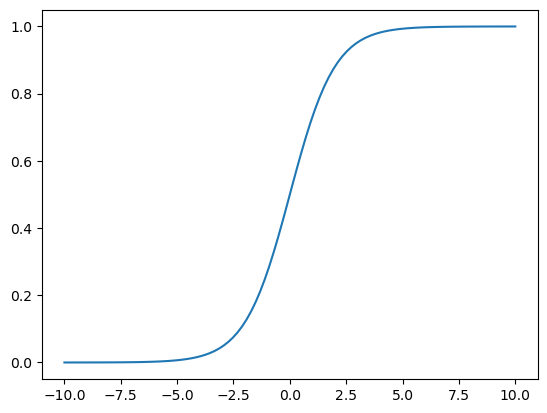

In [14]:
plt.plot(x, a)

In [24]:
A = np.array([[1,2]])
B = np.array([[1,2], [2, 1]])
A.shape, B.shape

((1, 2), (2, 2))

In [2]:
import numpy as np

In [19]:
def derivative(input: np.ndarray) -> np.ndarray:
    temp1 = np.zeros(
        (input.shape[0], input.shape[1]), dtype=np.float32
    )
    ny, m = input.shape
    for i in range(m):
        temp = np.zeros((ny, 1), dtype=np.float32)
        sample = input[:, i]
        # temp1[:, :, i] = np.outer(input[i], input[i])
        for row in range(ny):
            col_value = 0
            for col in range(ny):
                if row == col:
                    col_value+=sample[row]*(1-sample[row])
                else:
                    col_value += -sample[row]*sample[col]
            temp[row] = col_value
        # print(temp.shape)
        # print(temp1[:, i].shape)
        temp1[:, i] = temp.squeeze()
    return temp1

In [20]:
m = 100
ny = 10

output = np.random.randn(ny, m)
diff = derivative(output)
assert diff.shape == output.shape

In [22]:
diff.shape

(10, 100)

In [30]:
nl = 10
nl_prev = 8
A = np.random.rand(nl, 1)
B = np.random.rand(nl_prev, 100)

np.dot(A, B.T)

ValueError: shapes (10,1) and (100,8) not aligned: 1 (dim 1) != 100 (dim 0)

In [31]:
A_prev = np.array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

/tmp/ipykernel_41029/2385473660.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A_prev = np.array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],


In [33]:
A_prev

(7,)

In [35]:
A_Prev = np.array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])

In [36]:
delta_l = np.array([[ 0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01, -0.01, -0.01, -0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01, -0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,
         0.01, -0.01,  0.01, -0.01, -0.01]])

In [45]:
delta_l.shape, A_Prev.shape

((1, 50), (8, 50))

In [49]:
res = (A_Prev*delta_l).T
res.shape

(50, 8)

In [55]:
res[:, 1].shape

(50,)

In [50]:
np.sum(res, axis = 0)

array([0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18])

In [41]:
np.dot( delta_l, A_Prev.T)

array([[0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18]])

In [1]:
import numpy as np

In [2]:
np.random.random((2, 3))

array([[0.34729104, 0.88216545, 0.20821903],
       [0.88824091, 0.63535394, 0.79179218]])

## Fashion

In [4]:
import pandas as pd
from utils import one_hot
import numpy as np
from model import Sequential
from layers import Dense, Input
import matplotlib.pyplot as plt

In [2]:
fashion = pd.read_csv('../../fashion-mnist_train.csv')
classes = (0,1)
X = fashion.iloc[:, 1:].values
y = fashion.iloc[:, 0].values

y_1ids = np.where(y == classes[0])[0]
y_2ids = np.where(y == classes[1])[0]

y_final = np.concatenate((y_1ids, y_2ids))
X_final = X[y_final]
y_final = y[y_final]
y_final = (y_final == classes[0]).astype(int)
y = np.reshape(y_final, (1, -1))

X = X_final.T
X = X / X.max()
nx, _ = X.shape
ny = 1

model = Sequential("my_model")
inp = Input((nx,), name="First Input")
dense = Dense(20, activation="tanh", name="Dense 1")
model.add(inp)
model.add(dense)
model.add(Dense(10, name="Dense A", activation="tanh"))
model.add(Dense(8, name="Dense C", activation="tanh"))
model.add(Dense(ny, name="Dense Z", activation="sigmoid"))

model.summary()

model.compile(
    loss="binary_cross_entropy",
    metrics=["accuracy", "precision"],
    initializer="glorot",
)

history = model.fit(X, y, epochs=100, lr=0.01, batch_size=32, verbose=1)

Model: my_model
_________________________________________________________________________________________
Name           # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-----------  -----------  ---------------  -------------  --------------  ---------------
First Input          784  (0, 0)           (0, 0)                      0  (784,)
Dense 1               20  (20, 784)        (20, 1)                 15700  (20,)
Dense A               10  (10, 20)         (10, 1)                   210  (10,)
Dense C                8  (8, 10)          (8, 1)                     88  (8,)
Dense Z                1  (1, 8)           (1, 1)                      9  (1,)
Total Parameters: 16007
_________________________________________________________________________________________
Epoch 0100/0100 | Loss: 0.03339 | Accuracy: 0.98650 | Precision: 0.99795 | 


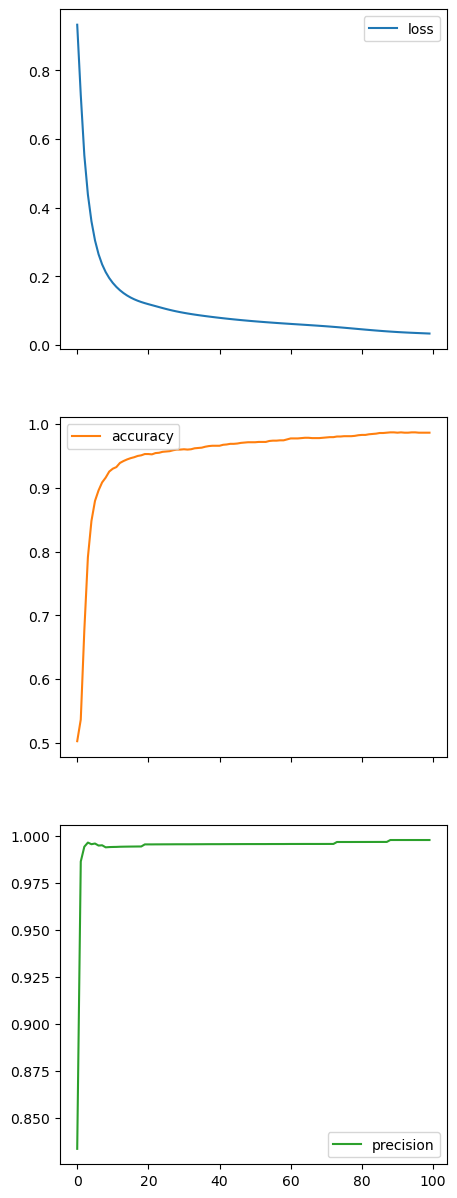

In [10]:
history_df = pd.DataFrame(history)

history_df.plot(subplots=True, figsize=(5, 15));

In [71]:
y_1ids = np.where(y == 0)[0]
y_2ids = np.where(y == 1)[0]
y_final = np.concatenate((y_1ids, y_2ids))
X_final = X[y_final]
y_final = y[y_final]
y = np.reshape(y_final, (1, -1))

X = X_final.T
X = X/X.max()
nx, m = X.shape
ny = 1

In [81]:
model = Sequential("my_model")
inp = Input((nx,), name="First Input")
dense = Dense(20, activation="relu", name="Dense 1")
model.add(inp)
model.add(dense)
model.add(Dense(10, name="Dense A", activation="relu"))
model.add(Dense(8, name="Dense C", activation="relu"))
model.add(Dense(ny, name="Dense Z", activation="sigmoid"))

model.summary()

Model: my_model
_________________________________________________________________________________________
Name           # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-----------  -----------  ---------------  -------------  --------------  ---------------
First Input          784  (0, 0)           (0, 0)                      0  (784,)
Dense 1               20  (20, 784)        (20, 1)                 15700  (20,)
Dense A               10  (10, 20)         (10, 1)                   210  (10,)
Dense C                8  (8, 10)          (8, 1)                     88  (8,)
Dense Z                1  (1, 8)           (1, 1)                      9  (1,)
Total Parameters: 16007
_________________________________________________________________________________________


In [87]:
model.compile(loss="binary_cross_entropy", metrics=["accuracy", "precision"], initializer="glorot")

In [88]:
model.fit(X, y, epochs=30, lr=0.01, batch_size=128)

Epoch 0001/0030 | Loss: 0.02402 | Accuracy: 0.82450 | Precision: 0.74885 | 
Epoch 0002/0030 | Loss: 0.06507 | Accuracy: 0.89850 | Precision: 0.84669 | 
Epoch 0003/0030 | Loss: 0.05300 | Accuracy: 0.89350 | Precision: 0.83705 | 
Epoch 0004/0030 | Loss: 0.03754 | Accuracy: 0.89400 | Precision: 0.83604 | 
Epoch 0005/0030 | Loss: 0.02367 | Accuracy: 0.89750 | Precision: 0.83759 | 
Epoch 0006/0030 | Loss: -0.00598 | Accuracy: 0.89650 | Precision: 0.83277 | 
Epoch 0007/0030 | Loss: -0.03755 | Accuracy: 0.89750 | Precision: 0.83194 | 
Epoch 0008/0030 | Loss: -0.06586 | Accuracy: 0.90200 | Precision: 0.83711 | 
Epoch 0009/0030 | Loss: -0.08826 | Accuracy: 0.90600 | Precision: 0.84277 | 
Epoch 0010/0030 | Loss: -0.10090 | Accuracy: 0.91400 | Precision: 0.85433 | 
Epoch 0011/0030 | Loss: -0.10545 | Accuracy: 0.92000 | Precision: 0.86320 | 
Epoch 0012/0030 | Loss: -0.10734 | Accuracy: 0.92200 | Precision: 0.86620 | 
Epoch 0013/0030 | Loss: -0.10560 | Accuracy: 0.93150 | Precision: 0.88007 | 
Epoc

## Multiclass

In [ ]:
import pandas as pd
from utils import one_hot
import numpy as np
from model import Sequential
from layers import Dense, Input

In [ ]:
fashion = pd.read_csv('../../fashion-mnist_train.csv')
X = fashion.iloc[:, 1:].values
y = fashion.iloc[:, 0].values
X.shape, y.shape

In [26]:
y_oh = one_hot(y, 10)

In [27]:
X = X.T
X = X/X.max()
X.shape, y_oh.shape, X.min(), X.max()

((30, 569), (10, 569), 0.0, 1.0)

In [6]:
nx, m = X.shape
ny, m = y_oh.shape
print(nx, ny, m)

784 10 10000


In [17]:
np.alltrue(y_oh.argmax(axis = 0) == y)

True

In [7]:
from model import Sequential
from layers import Dense, Input

In [8]:
model = Sequential("my_model")
inp = Input((nx,), name="First Input")
dense = Dense(20, activation="tanh", name="Dense 1")
model.add(inp)
model.add(dense)
model.add(Dense(10, name="Dense A", activation="tanh"))
model.add(Dense(8, name="Dense C", activation="tanh"))
model.add(Dense(ny, name="Dense Z", activation="softmax"))

model.summary()

Model: my_model
_________________________________________________________________________________________
Name           # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
-----------  -----------  ---------------  -------------  --------------  ---------------
First Input          784  (0, 0)           (0, 0)                      0  (784,)
Dense 1               20  (20, 784)        (20, 1)                 15700  (20,)
Dense A               10  (10, 20)         (10, 1)                   210  (10,)
Dense C                8  (8, 10)          (8, 1)                     88  (8,)
Dense Z               10  (10, 8)          (10, 1)                    90  (10,)
Total Parameters: 16088
_________________________________________________________________________________________


In [9]:
model.compile(loss="categorical_cross_entropy", metrics=["accuracy", "precision"], initializer="glorot")

In [12]:
y_oh

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
model.fit(X, y_oh, epochs=10, lr=0.01, batch_size=64)

Epoch    1/  10 | Loss: 2.34757 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch    2/  10 | Loss: 2.33998 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch    3/  10 | Loss: 2.33368 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch    4/  10 | Loss: 2.32829 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch    5/  10 | Loss: 2.32356 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch    6/  10 | Loss: 2.31934 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch    7/  10 | Loss: 2.31555 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch    8/  10 | Loss: 2.31212 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch    9/  10 | Loss: 2.30904 | Accuracy: 9.00000 | Precision: 0.00000 | 
Epoch   10/  10 | Loss: 2.30628 | Accuracy: 9.00000 | Precision: 0.00000 | 


In [13]:
y_pred = model.predict(X)

In [14]:
y_pred.shape

(10, 10000)

In [17]:
import numpy as np

In [20]:
np.mean((y_oh == np.argmax(y_pred, axis=0)))

0.03439

In [11]:
from sklearn.datasets import make_regression

In [16]:
X, y, coef = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.02, shuffle=True, coef=True, random_state=None)

In [18]:
X.shape, y.shape, coef

((1000, 10),
 (1000,),
 array([ 0.        ,  0.        , 79.3296363 ,  0.        ,  0.        ,
         0.        , 86.4055538 , 95.74265568, 88.76716511, 44.25350894]))

In [21]:
X.min(), X.max()

(-3.672925653222597, 3.4994043601284357)

In [22]:
y.min(), y.max()

(-559.8183861232799, 573.1392761055567)